In [2]:
#导入MLP神经网络
from sklearn.neural_network import MLPClassifier
#导入红酒数据集
from sklearn.datasets import load_wine
#导人数据集拆分工具
from sklearn.model_selection import train_test_split
wine= load_wine()
X =wine.data[:,:2]
y = wine.target
#下面我们拆分数据集
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
mlp=MLPClassifier(solver="lbfgs")#参数里面都不需要规定数据的size的
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

和我们之前使用的算法一样， MLP 分类器也把它自己的参数给我们返
了回来。其中sol v er = ' lb fgs ’是我们在代码中指定的，而其他的参数都是算法默认的。
下面我们重点看一下各个参数的含义：
activation 是8. 2 .2 节中提到的将隐藏单元进行非线性化的方法， 一共有4 种：
“ ide ntity ”“logistic ” “ ta nh ＂以及“ relu ”， 而在默认情况下，参数值是“ relu ” 。其
中“ identity ＂ 对样本特征不做处理， 返回值是j (x) =x；而“ logistic ＂返回的结果会是j (x)
= I I [ I + exp C - x ) ］ ， 这种方法和tanh 类似， 但是经过处理后的特征值会在0 和1 之间。
其余两个参数值， tanh 和relu 我们已经介绍过， 在这里就不重复了。
a l pha 值和线性模型的alpha 值是一样的， 是一个L2 惩罚项， 用来控制正则化的程度，
默认的数值是0.0001 。
这里着重介绍一下hidden_ l ayer_ sizes 参数， 默认情况下， hidden_layer_ siz es 的值
是［ 100 ，］ 这意味着模型中只有一个隐藏层，而隐藏层中的节点数是100 。如果我们给
hidden _ layer_ sizes 定义为［ 10 , 10］ ，那就意味着模型中有两个隐藏层， 每层有10 个节点。

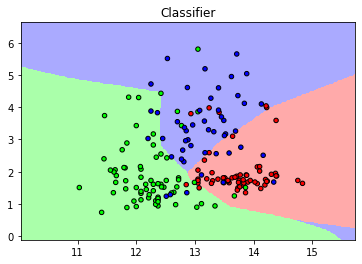

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA","#AAAAFF"])
cmap_bold = ListedColormap ([ "#FF0000","#00FF00","#0000FF"])
#分别用样本的两个特征值创建图像和横轴和纵轴
x_min,x_max= X_train[:,0].min()-1 , X_train[:,0].max() + 1
y_min , y_max = X_train [ :, 1].min()-1,X_train [ :, 1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max, 0.02),
np.arange(y_min,y_max , 0.02))
Z = mlp.predict(np.c_[xx.ravel(),yy.ravel()])
#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx , yy , Z , cmap=cmap_light)
#用散点把样本表示出来
plt.scatter(X[ :,0], X[ :, 1], c=y, cmap=cmap_bold , edgecolor= "k",s =20 )
plt.xlim(xx.min() , xx.max () )#横纵坐标的范围
plt.ylim (yy.min () , yy.max ())
plt.title(  "Classifier"  )
plt.show()

如果activation 换成tanh的话，它的分类边界就会更加的细腻


有4 种方法可以调节模型的复杂程度了，
第一种是调整神经网络每一个隐藏层上的节点数， 第2 种是调节神经网络隐藏层的层数，
第3 种是调节activation 的方式，而第4 种，便是通过调整alpha 值来改变模型正则化的程度。

In [ ]:
# #导入数据集获取工具
# from sklearn.datasets import fetch_mldata
# #加载载MNIST手写数字数据集
# mnist = fetch_mldata("MNIST original")
# mnist
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
print()
print ("代码运行结果")
print ( '==============================\n ' )
#打印样本数量和样本特征数
print ("样本数量·｛｝ ， 样本特征数{}".format(mnist.data.shape[0],
mnist.data.shape[l]))


In [ ]:
#设置神经网络有两个100 个节点的隐藏层
mlp_hw = MLPClassifier(solver ="lbfgs" , hidden_layer_sizes=[100,100] ,
activation= "relu" , alpha= 1e-5 , random_state=62 )
#使用数据训练神经网络模型
mlp_hw.fit(X_train,y_train)
#打印模型分数
print("测试数据集得分： { :. 2f ）哇".format(mlp_hw.score(X_test,y_test) *100 ))

L-BFGS是解无约束非线性规划问题最常用的方法，具有收敛速度快、内存开销少等优点，在机器学习各类算法中常有它的身影。简单的说，L-BFGS和梯度下降、SGD、牛顿法，拟牛顿法干的同样的事情，但大多数情况下收敛速度更快，这点在大规模计算中很重要。下图是深度学习Autoencoder模型不同优化方法的比较。
